In [1]:
import pandas as pd
import numpy as np
import pickle

# Logistic Regression

Logistic regression is a process of modeling the probability of a discrete outcome given an input variable. The most common logistic regression models a binary outcome; something that can take two values such as true/false, yes/no, and so on.

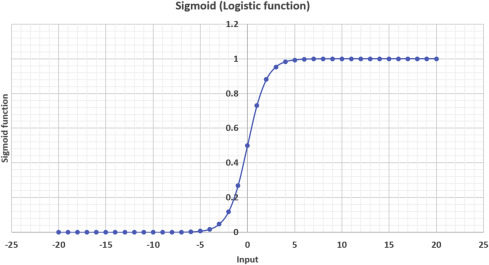

### Types of Logistic Regression: 
1. Binary Logistic Regression

    The categorical response has only two 2 possible outcomes. Example: Spam or Not

2. Multinomial Logistic Regression

    Three or more categories without ordering. Example: Predicting which food is preferred more (Veg, Non-Veg, Vegan)

3. Ordinal Logistic Regression

    Three or more categories with ordering. Example: Movie rating from 1 to 5

In [2]:
with open('diabetes.txt','rb') as f:
    data = pickle.load(f)
X = data['data']
y = data['target']
df_data = pd.DataFrame(X, columns=data['feature_names'])
df_data['y'] = y
df_data.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [3]:
df_data.describe()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,y
count,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,-3.634285e-16,1.308343e-16,-8.045349e-16,1.281655e-16,-8.835316e-17,1.327024e-16,-4.574646e-16,3.777301e-16,-3.830854e-16,-3.412882e-16,152.133484
std,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123996e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260974e-01,-1.377672e-01,25.000000
25%,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665645e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324879e-02,-3.317903e-02,87.000000
50%,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670611e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947634e-03,-1.077698e-03,140.500000
75%,3.807591e-02,5.068012e-02,3.124802e-02,3.564384e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243323e-02,2.791705e-02,211.500000
max,1.107267e-01,5.068012e-02,1.705552e-01,1.320442e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335990e-01,1.356118e-01,346.000000


In [4]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  y       442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


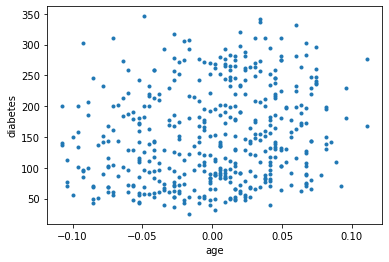

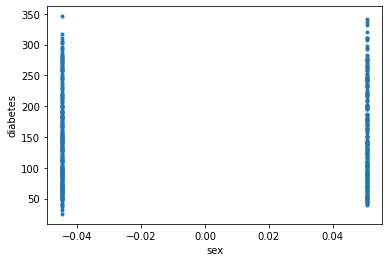

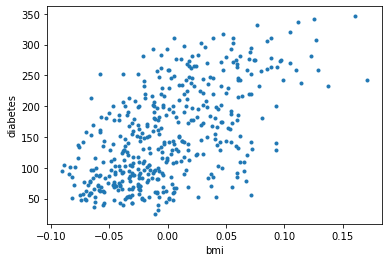

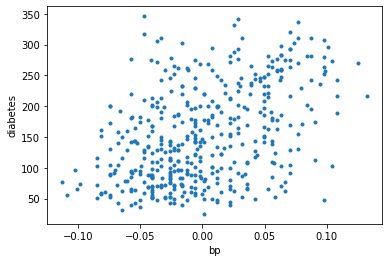

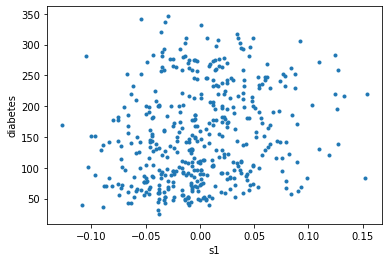

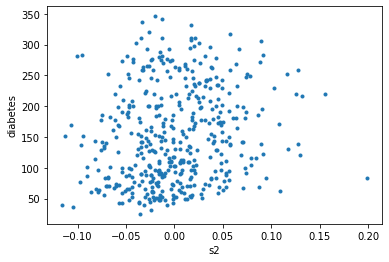

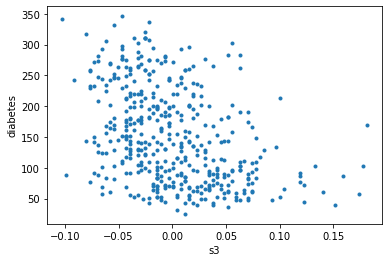

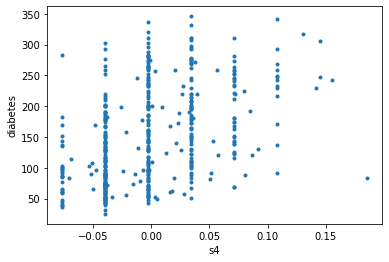

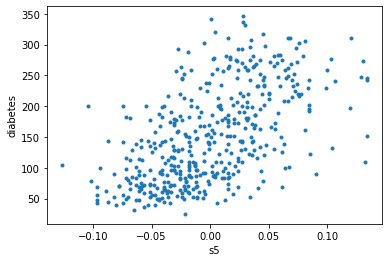

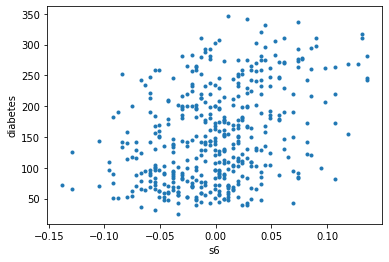

In [3]:
import matplotlib.pyplot as plt
for feture_name in data['feature_names']:
    plt.plot(df_data[feture_name],y,'.')
    plt.xlabel(feture_name)
    plt.ylabel('diabetes')
    plt.show()


In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np

class myLogisticRegression:
    def __init__(self):
        '''
        buildmodel
        '''
        self.clf = make_pipeline(
            StandardScaler(),
            LogisticRegression()
        )

    def train(self, X, y):
        '''
        train
        :param X:
        :param y:
        :return:
        '''
        self.clf = self.clf.fit(X, y)
        return self.clf

    def predict(self, X):
        '''
        predict
        :param X:
        :return:
        '''
        return self.clf.predict(X)

In [11]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
def eval_result(y, pre_y):
    '''
    :param y:
    :param pre_y:
    :return:
    '''
    rmse = mean_squared_error(y, pre_y, squared=False)
    mae = mean_absolute_error(y,pre_y)
    return {'rmse':rmse,
            'mae':mae}

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=1)

In [13]:
model = myLogisticRegression()
model.train(X_train,y_train)


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [14]:
pre_y_train = model.predict(X_train)
eval_train = eval_result(y_train, pre_y_train)
print('eval_train\n', eval_train)

eval_train
 {'rmse': 59.86363162166863, 'mae': 36.73087818696884}


In [15]:
pre_y_test = model.predict(X_test)
eval_test = eval_result(y_test, pre_y_test)
print('eval_test\n',eval_test)

eval_test
 {'rmse': 79.81178702619437, 'mae': 60.70786516853933}


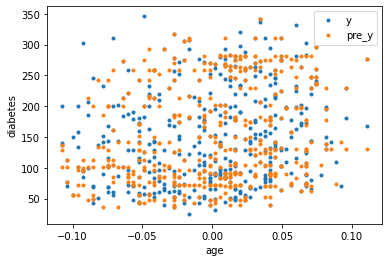

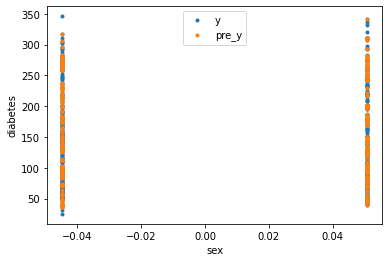

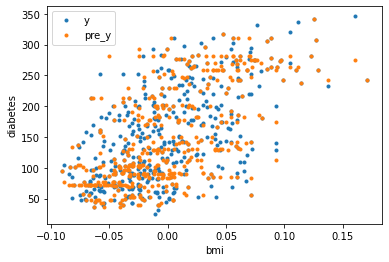

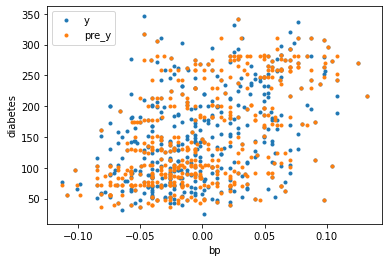

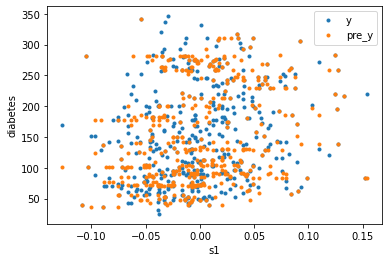

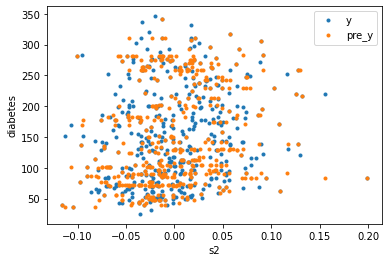

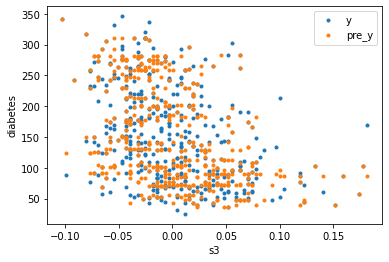

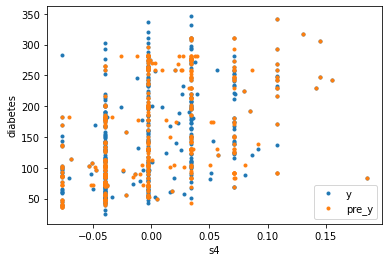

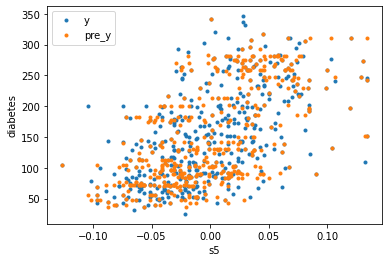

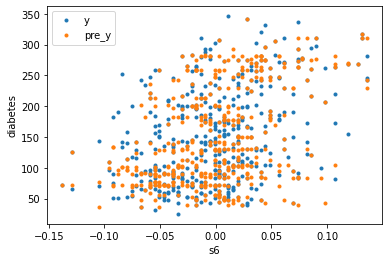

In [10]:
pre_y = model.predict(X)
import matplotlib.pyplot as plt
for feture_name in data['feature_names']:
    plt.plot(df_data[feture_name],y,'.')
    plt.plot(df_data[feture_name],pre_y,'.')
    plt.legend(['y','pre_y'])
    plt.xlabel(feture_name)
    plt.ylabel('diabetes')
    plt.show()